# Functions

## What are functions?

Functions are reusable blocks of code that perform a specific task. They help streamline your code by allowing you to avoid repetition, improve readability, and make maintenance easier.

The general syntax for defining a function is the following:

```python
def function_name(parameter_1, ..., parameter_n):
    """Docstring"""
    <body of the function>
    return value  # Depending on the function
```

In [1]:
# Example 1: one-line docstring, no parameters, no return value
def greet():
    """Print a greeting message."""
    print("Hello, welcome to the class!")

In [2]:
# Example 2: multi-line docstring, parameters, and return value
def calculate_area(radius):
    """
    Calculate the area of a circle given its radius.
    
    Args:
        radius (float): The radius of the circle.
        
    Returns:
        float: The area of the circle, calculated as π * radius^2.
    """
    area = 3.14159 * radius ** 2
    return area

## Data loading and preparation

We'll practice creating functions using the same datasets from last week.

In [3]:
import os
import pandas as pd

import geopandas as gpd
import matplotlib.pyplot as plt

# Display all columns when looking at dataframes
pd.set_option("display.max.columns", None)

# --------------------------------------------------
# Import power plants data
URL = 'https://raw.githubusercontent.com/carmengg/eds-220-book/refs/heads/main/data/power_plants_epsg4269.csv'
power_plants = pd.read_csv(URL)
power_plants = power_plants.drop(columns='Unnamed: 0') # Drop first column

# Import states data
fp = os.path.join('data','tl_2022_us_state','tl_2022_us_state.shp')
states = gpd.read_file(fp)
states.columns = states.columns.str.lower()

# --------------------------------------------------
# Create geometry column for power plants
points = gpd.points_from_xy(power_plants.longitude,
                            power_plants.latitude)

# Convert power plants DataFrame to GeoDataFrame
power_plants = gpd.GeoDataFrame(power_plants,      # Data
                                geometry=points,   # Specify geometry column
                                crs='EPSG:4269'    # Specify CRS
                                )


## Exercise: CA top power plant sources map

Last week we solved the followinge exercise to use a `for` with a `zip` to create subplots of the top 3 power plant sources in California.

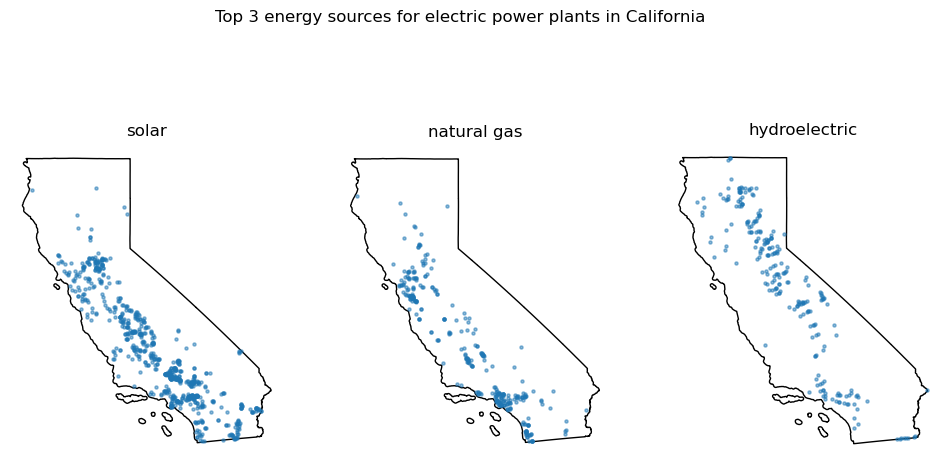

In [4]:
# Select CA power plants and boundary
ca_power_plants = power_plants[power_plants['state'] == 'California']
ca_boundary = states[states['name'] == 'California']

# CA top 3 power sources were previously given
ca_top_sources = ['solar', 'natural gas', 'hydroelectric']

# Create subplots for each top source in a single figure
fig, ax = plt.subplots(figsize=(12,6), nrows=1, ncols=3)
for axis, source in zip(ax, ca_top_sources):   # Iterate over subplots and energy sources

    axis.set_title(source)
    axis.axis('off')

    ca_boundary.plot(ax=axis,
                     color='none')
    
    # Subset power plants by source and plot
    source_subset = ca_power_plants[ca_power_plants['primsource'] == source]
    source_subset.plot(ax=axis,
                    markersize=5,
                    alpha=0.5)

plt.suptitle(f"Top 3 energy sources for electric power plants in California")    
plt.show()

In [5]:
for radius in [1,2,3]:
    area = calculate_area(radius)
    print(f"The area of a circle with radius {radius} is {area:.2f}")

The area of a circle with radius 1 is 3.14
The area of a circle with radius 2 is 12.57
The area of a circle with radius 3 is 28.27


## Steps to create a function
My recommended steps for writing a function:
1. Solve the problem for specific example
2. Identify which parts of the code need to be generalized and update these parts
3. Wrap this into a function
4. Add additional parameters or assert statements
5. Test function
6. Add a docstring

Example: we want to obtain the top 3 power sources for any state programmatically as a function

### Step 1: solve for a specific example

Example: Solve for CA

In [ ]:
power_plants[power_plants['state'] == 'California']

NameError: name 'state_power_plants' is not defined

In [11]:
state_power_plants = power_plants[power_plants['state'] == 'California']
top_sources = (state_power_plants['primsource']
                                .value_counts()
                                .index[:3]
                                .tolist())
top_sources

['solar', 'natural gas', 'hydroelectric']

## Step 2: Identify parts of the code that need to be generalized

In [12]:
state = 'California'
state_power_plants = power_plants[power_plants['state'] == state]
top_sources = (state_power_plants['primsource']
                                .value_counts()
                                .index[:3]
                                .tolist())
top_sources

['solar', 'natural gas', 'hydroelectric']

## Step 3: Define the function 
and
## Step 4: Adjust your parameters

In [16]:
def top3_sources(state, power_plants):
    state_power_plants = power_plants[power_plants['state'] == state]
    top_sources = (state_power_plants['primsource']
                                .value_counts()
                                .index[:3]
                                .tolist())
    return top_sources

In [18]:
top3_sources('Oregon', power_plants)

['solar', 'hydroelectric', 'wind']

## Example

Create a function that will produce a plot given a list of primary sources 

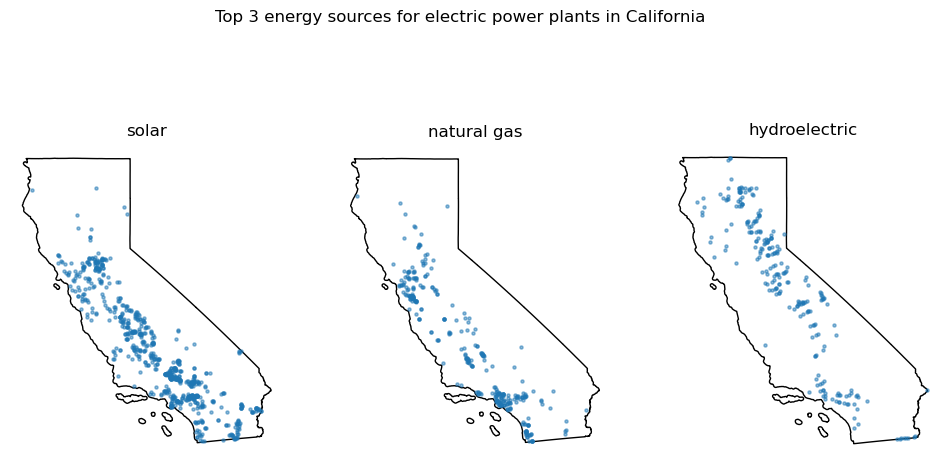

In [20]:
# Select CA power plants and boundary
ca_power_plants = power_plants[power_plants['state'] == 'California']
ca_boundary = states[states['name'] == 'California']

# CA top 3 power sources were previously given
ca_top_sources = top3_sources('California', power_plants)

# Create subplots for each top source in a single figure
fig, ax = plt.subplots(figsize=(12,6), nrows=1, ncols=3)
for axis, source in zip(ax, ca_top_sources):   # Iterate over subplots and energy sources

    axis.set_title(source)
    axis.axis('off')

    ca_boundary.plot(ax=axis,
                     color='none')
    
    # Subset power plants by source and plot
    source_subset = ca_power_plants[ca_power_plants['primsource'] == source]
    source_subset.plot(ax=axis,
                    markersize=5,
                    alpha=0.5)

plt.suptitle(f"Top 3 energy sources for electric power plants in California")    
plt.show()

## Step 2: Which parts of the code need to be generalized

Anything where California is used specifically

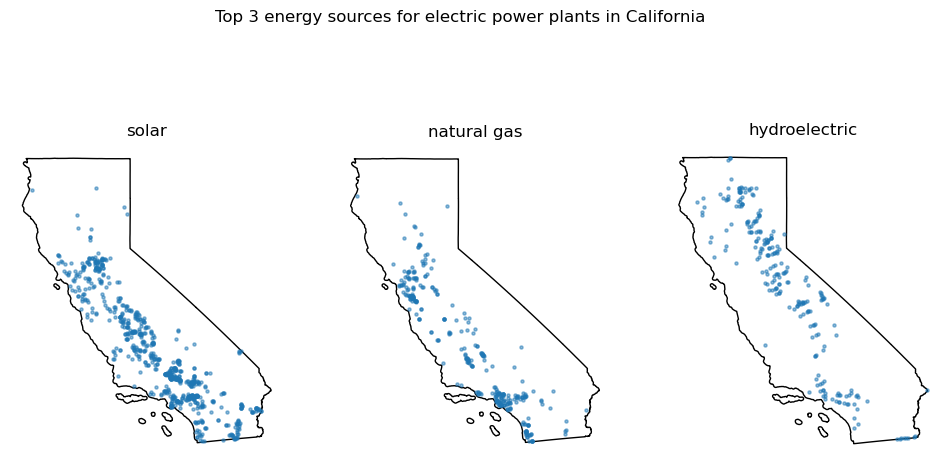

In [ ]:
state = 'California'
# Select state power plants and boundary
state_power_plants = power_plants[power_plants['state'] == state]
state_boundary = states[states['name'] == state]

# State top 3 power sources were previously given
state_top_sources = top3_sources(state, power_plants)

# Create subplots for each top source in a single figure
fig, ax = plt.subplots(figsize=(12,6), nrows=1, ncols=3)
for axis, source in zip(ax, state_top_sources):   # Iterate over subplots and energy sources

    axis.set_title(source)
    axis.axis('off')

    state_boundary.plot(ax=axis,
                     color='none')
    
    # Subset power plants by source and plot
    source_subset = state_power_plants[state_power_plants['primsource'] == source]
    source_subset.plot(ax=axis,
                    markersize=5,
                    alpha=0.5)

plt.suptitle(f"Top 3 energy sources for electric power plants in {state}")    
plt.show()

In [25]:
def plot_top3_power_sources(state, power_plants, states):
    # Select state power plants and boundary
    state_power_plants = power_plants[power_plants['state'] == state]
    state_boundary = states[states['name'] == state]

    # State top 3 power sources were previously given
    state_top_sources = top3_sources(state, power_plants)

    # Create subplots for each top source in a single figure
    fig, ax = plt.subplots(figsize=(12,6), nrows=1, ncols=3)
    for axis, source in zip(ax, state_top_sources):   # Iterate over subplots and energy sources
        axis.set_title(source)
        axis.axis('off')

    state_boundary.plot(ax=axis,
                        color='none')

    # Subset power plants by source and plot
    source_subset = state_power_plants[state_power_plants['primsource'] == source]
    source_subset.plot(ax=axis,
                    markersize=5,
                    alpha=0.5)

    plt.suptitle(f"Top 3 energy sources for electric power plants in {state}")    
    plt.show()

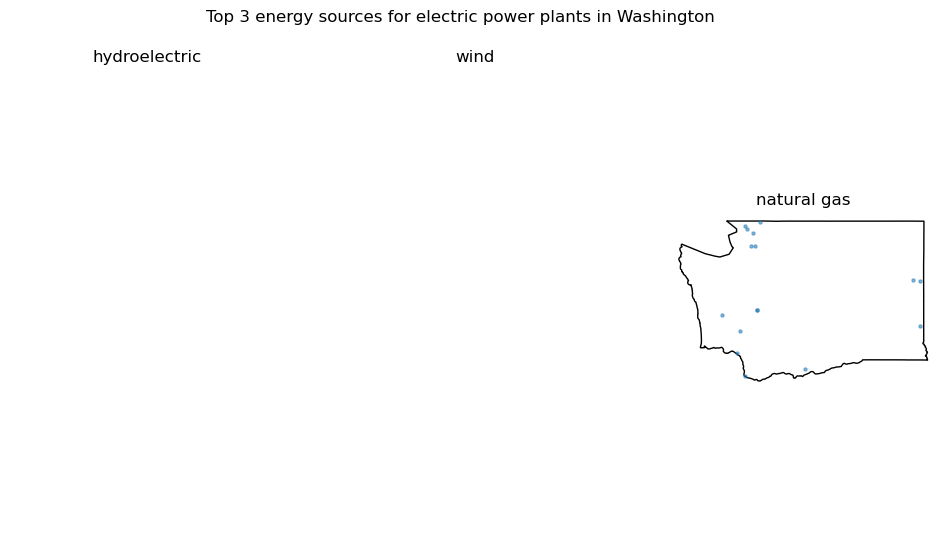

In [28]:
plot_top3_power_sources('Washington', power_plants, states)

In [63]:
def power_source_counts(source, power_plants):
    power_source_counts = power_plants[power_plants['primsource'] == source].groupby('state').size().index[:3].tolist()
    return power_source_counts

In [65]:
power_source_counts('hydroelectric', power_plants)

['Alabama', 'Alaska', 'Arizona']

In [103]:
def plot_power_source(source, power_plants, states):
    top_sources = power_source_counts(source, power_plants)

    for state in top_sources:
        fig, ax = plt.subplots(figsize=(12,6), nrows = 1, ncols = 3)

        state_boundary = states[states['name'] == state]
        state_boundary.plot(ax = ax,
                            color = 'none')

        state_power_plants = power_plants[power_plants['state'] == state]
        source_subset = state_power_plants[state_power_plants['primsource'] == source]
        source_subset.plot(ax=ax,
                            markersize=5,
                            alpha=0.5)

AttributeError: 'numpy.ndarray' object has no attribute 'set_aspect'

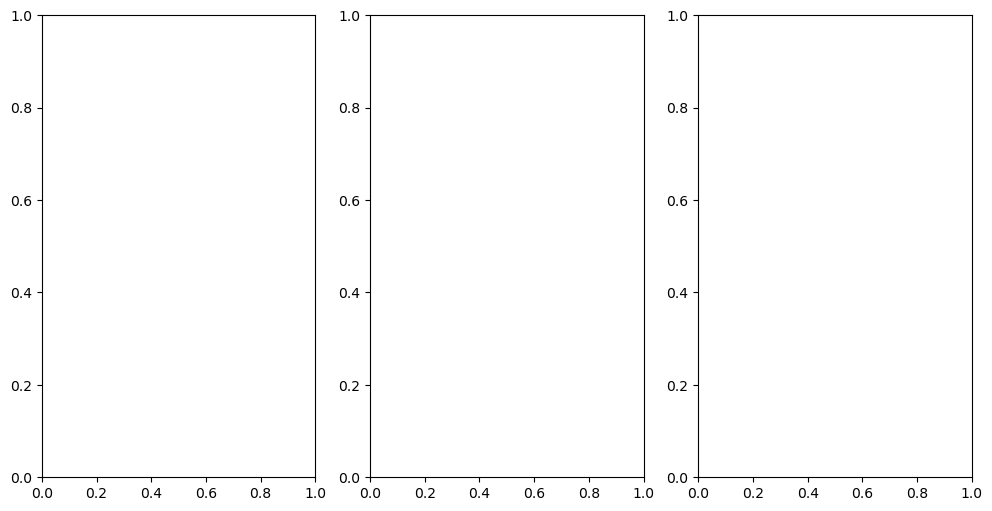

In [104]:
plot_power_source('wind', power_plants, states)

list